In [1]:
#conda install -c conda-forge fbprophet
#pip install plotly

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline
from datetime import datetime, timedelta


In [13]:
df = pd.read_csv('GAZP.csv')
df[['Date','Close']] = data[['<DATE>','<CLOSE>']]

In [14]:
df = df[['Date', 'Close']].dropna()
df.head()

,Date,Close
0,01/05/15,133.95
1,01/06/15,138.92
2,01/08/15,146.46
3,01/09/15,141.70
4,01/12/15,140.22


In [15]:
dow = pd.to_datetime(df.Date)
df['day_of_week'] = dow.dt.weekday

In [19]:
df.tail(15)

,Date,Close,day_of_week
1472,11/09/20,170.13,0
1473,11/10/20,172.92,1
1474,11/11/20,170.53,2
1475,11/12/20,172.91,3
1476,11/13/20,180.30,4
1477,11/16/20,185.32,0
1478,11/17/20,182.90,1
1479,11/18/20,185.00,2
1480,11/19/20,184.16,3
1481,11/20/20,183.21,4


In [20]:
df.columns = ['ds', 'y', 'dw']
df

,ds,y,dw
0,01/05/15,133.95,0
1,01/06/15,138.92,1
2,01/08/15,146.46,3
3,01/09/15,141.70,4
4,01/12/15,140.22,0
...,...,...,...
1482,11/23/20,184.15,0
1483,11/24/20,186.76,1
1484,11/25/20,188.03,2
1485,11/26/20,185.52,3


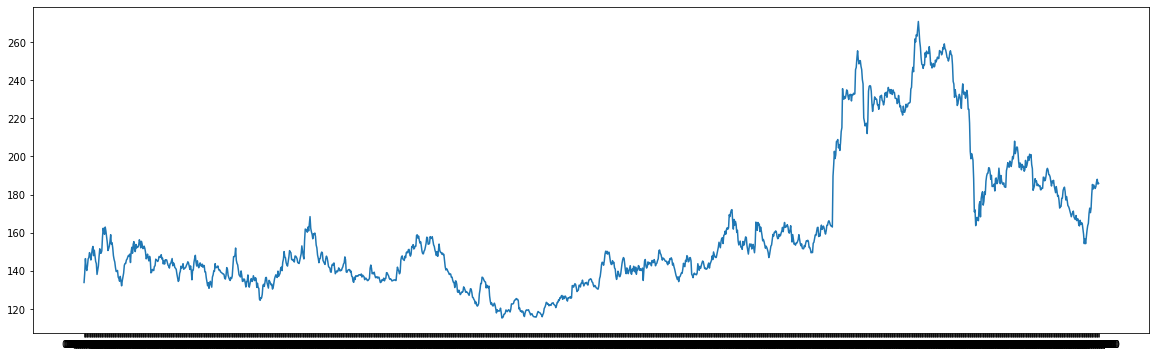

In [21]:
fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(df.ds, df.y)

In [39]:
prophet  = Prophet(daily_seasonality=True)
prophet.fit(df)

future = prophet.make_future_dataframe(periods=90)
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1572,2021-02-21,148.406137,134.538368,161.594603
1573,2021-02-22,150.001094,136.192298,162.770864
1574,2021-02-23,149.705863,135.827701,162.509123
1575,2021-02-24,149.319830,135.674410,162.921737
1576,2021-02-25,148.553295,135.470288,160.490903


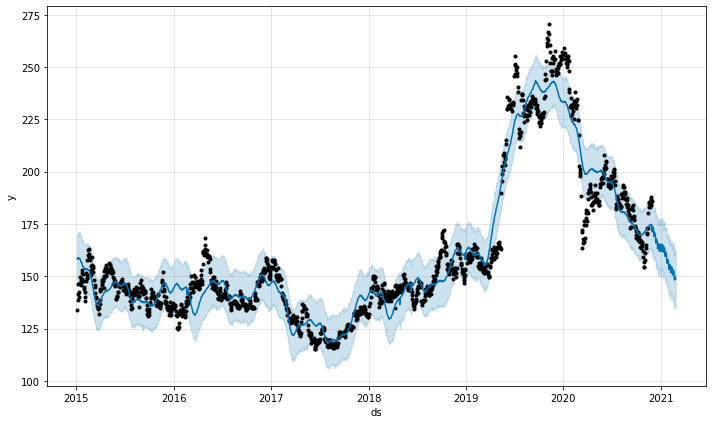

In [40]:
fig1 = prophet.plot(forecast)

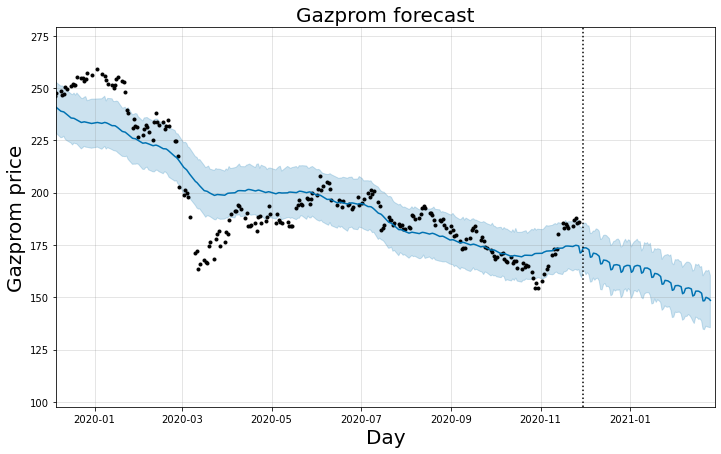

In [41]:
from datetime import datetime, timedelta

fig1 = prophet.plot(forecast)

datenow = datetime.now()
dateend = datenow + timedelta(days=90)
datestart = dateend - timedelta(days=450)

plt.xlim([datestart, dateend])
plt.title("Gazprom forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Gazprom price", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

In [42]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-20:]

,ds,yhat,yhat_lower,yhat_upper
1557,2021-02-06,151.707401,139.058757,164.349856
1558,2021-02-07,152.198028,139.539127,165.243251
1559,2021-02-08,154.214291,140.963432,166.214772
1560,2021-02-09,154.392296,140.846373,166.845620
1561,2021-02-10,154.524229,141.796046,166.794628
1562,2021-02-11,154.312197,141.204754,166.471247
1563,2021-02-12,154.014385,140.170269,165.406699
1564,2021-02-13,150.608124,138.670337,162.548773
1565,2021-02-14,151.033723,137.475004,163.086826
1566,2021-02-15,152.945524,140.534924,165.872104


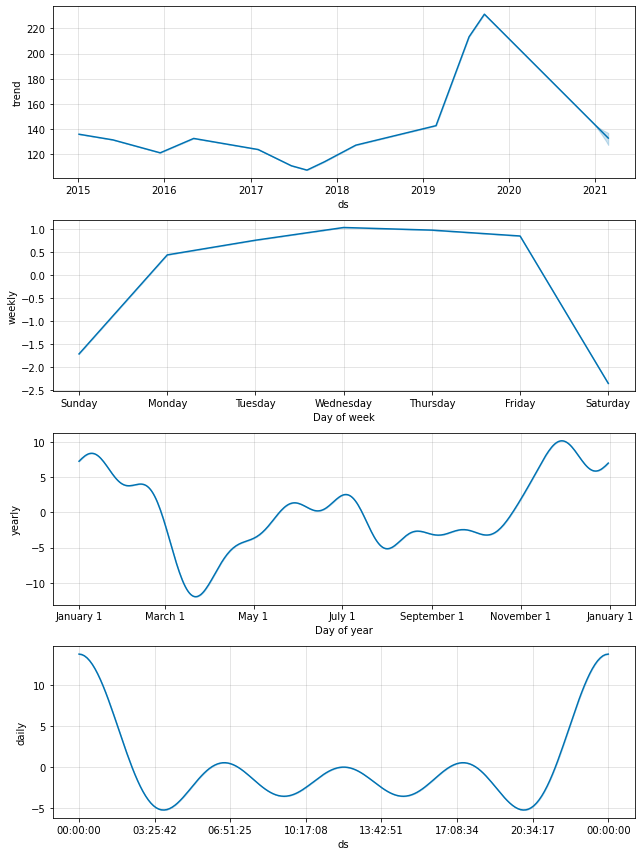

In [43]:
fig2 = prophet.plot_components(forecast)

In [44]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(prophet, horizon='30 days')
df_pred = performance_metrics(df_cv)
df_pred.head(5)

INFO:fbprophet:Making 118 forecasts with cutoffs between 2016-01-08 00:00:00 and 2020-10-28 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,307.911249,17.547400,10.326228,0.057391,0.035393,0.560451
1,4 days,315.897034,17.773492,10.726948,0.059146,0.037896,0.526467
2,5 days,335.259253,18.310086,11.133162,0.061065,0.039083,0.491321
3,6 days,356.542011,18.882320,11.479894,0.063473,0.041206,0.479808
4,7 days,363.505844,19.065829,11.560200,0.064391,0.038708,0.497801


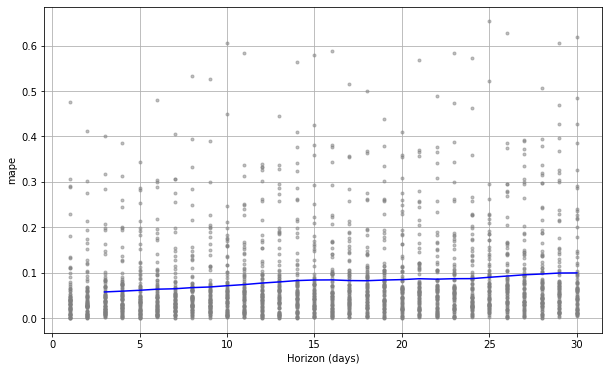

In [45]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

In [46]:
import pickle
with open('forecast_model.pckl', 'wb') as fm:
    pickle.dump(prophet, fm)

with open('forecast_model.pckl', 'rb') as fm_fin:
    prophet_ = pickle.load(fm_fin)

In [47]:
future2 = prophet_.make_future_dataframe(periods=90)
forecast2 = prophet_.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1572,2021-02-21,148.406137,136.200913,161.236249
1573,2021-02-22,150.001094,137.178941,163.751999
1574,2021-02-23,149.705863,136.736645,163.519744
1575,2021-02-24,149.319830,136.224760,162.450303
1576,2021-02-25,148.553295,136.898342,161.922135


In [48]:
#pip install flask_cors

In [49]:
from flask import Flask, jsonify, request
from flask_cors import CORS, cross_origin

In [ ]:
app = Flask(__name__)
CORS(app)

@app.route("/", methods=['GET','POST'])
def predict():
    horizon = int(request.json['horizon'])
    
    future2 = prophet_.make_future_dataframe(periods=horizon)
    forecast2 = prophet_.predict(future2)
    
    data = forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-horizon:]
    
    ret = data.to_json(orient='records', date_format='iso')
    
    return ret

# running REST interface, port=3000 for direct test
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [29/Nov/2020 21:35:25] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Nov/2020 21:35:30] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Nov/2020 21:35:58] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Nov/2020 21:37:06] "POST / HTTP/1.1" 200 -
